In [111]:
from global_config import config
import pandas as pd
import numpy as np
import rpy2
import os

from datetime import date, timedelta


data_dir_mnps   = config.get_property('geo_dir')
data_dir        = config.get_property('data_dir')
fb_ppl_data     = config.get_property('covid_fb')
results_dir     = config.get_property('results_dir')
data_cases_path = os.path.join(fb_ppl_data, 'agglomerated', 'geometry')

In [112]:
rt_df = pd.read_csv( os.path.join(results_dir, 'bog_rt', 'rt_df_bog_confirmation.csv') )
rt_df = rt_df[rt_df["variable"]=='R']
rt_df['date'] = rt_df['date'].map(lambda x: pd.to_datetime(0)+timedelta(days=x))


cases_df = pd.read_csv(os.path.join(data_cases_path, 'cases.csv'), parse_dates=["date_time"])

In [113]:
PR_2020_df     = pd.read_csv(os.path.join(data_dir,  'pagerank_ciudades2_2020.csv'), sep=',', parse_dates=['date']).set_index(['date','attribute_name'] )
PR_2021_df     = pd.read_csv(os.path.join(data_dir,  'pagerank_ciudades2.csv'), sep=',', parse_dates=['date']).set_index(['date','attribute_name'] )
pr_df = pd.concat([PR_2020_df, PR_2021_df]).reset_index()


In [114]:
ppr_bog_df = pr_df[pr_df["attribute_name"]=="personalized_pagerank_gini_index"]
pr_bog_df  = pr_df[pr_df["attribute_name"]=="pagerank_gini_index"]

ppr_bog_df = ppr_bog_df.set_index('date') #
ppr_bog_df = ppr_bog_df[["attribute_value"]].resample('1D').mean()#.interpolate(method='polynomial', order=2)
ppr_bog_df = ppr_bog_df.interpolate(method='linear', order=2)
ppr_bog_df = ppr_bog_df.reset_index()


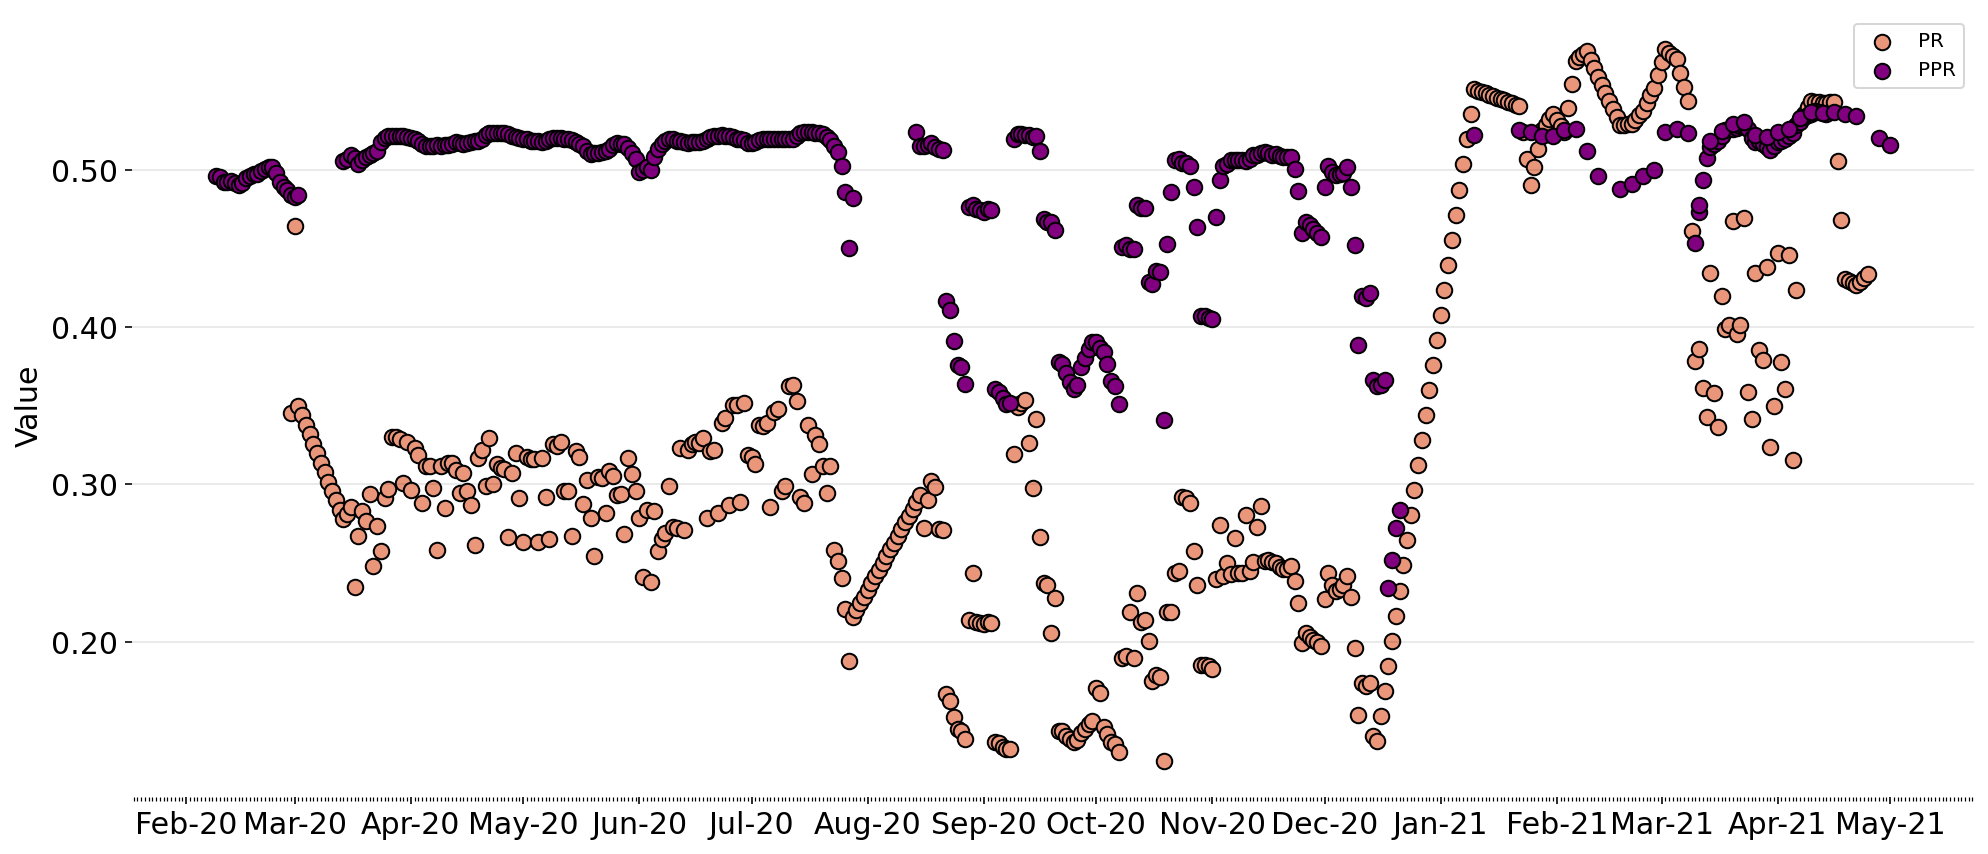

In [115]:
%config InlineBackend.figure_format ='retina'

from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(16.5, 7.2))
ax.scatter(ppr_bog_df["date"], ppr_bog_df["attribute_value"], facecolor='darksalmon', edgecolor='k', s=60, label='PR')
ax.scatter(pr_bog_df["date"], pr_bog_df["attribute_value"], facecolor='purple', edgecolor='k', s=60, label='PPR')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator())

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.tick_params(axis='both', labelsize=15)
ax.set_ylabel('Value', fontsize=15)
ax.legend()

In [118]:
def crosscorr(series1, series2, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return series2.corr(series1.shift(lag))


def compute_correlation(series2, series1, lags = list(range(10)), start_day='01-04-2020', final_day=None):

    if not start_day:
        start_day = min(series1.index.values[0], series2.index.values[0])
    if not final_day:
        final_day = min(series1.index.values[-1], series2.index.values[-1])

    min_date = pd.to_datetime(start_day, dayfirst=True)
    max_date = pd.to_datetime(final_day, dayfirst=True)

    series1 = series1.loc[start_day:max_date]
    series2 = series2.loc[start_day:max_date]

    corr_df = pd.DataFrame(columns = ['lag', 'value'])
    corr_df['lag'] = lags
    corr_df = corr_df.set_index('lag')

    for idx, lag in enumerate(lags):
        corr_df.loc[lag]['value'] = crosscorr(series1, series2, lag=lag)

    return corr_df

,num_cases,num_diseased
date_time,,
2020-02-26,1,0.0
2020-02-28,1,0.0
2020-03-04,3,0.0
2020-03-05,3,0.0
2020-03-06,5,0.0
...,...,...
2021-04-24,321,4.0
2021-04-25,189,0.0
2021-04-26,143,3.0
